### Import libraries and load the Heart Disease dataset
We'll import essential Python libraries for data analysis and visualization, then load the dataset directly into a pandas DataFrame.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = r"C:\Repos\applied-ml-karto\data\heart.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Check for basic information and missing values
We’ll explore the dataset to understand column names, data types, and any missing values.


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Display summary statistics
This helps us understand the distribution, mean, and range of each numeric feature.


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualize the target variable distribution
The target column indicates heart disease presence (1) or absence (0). A histogram helps show how balanced the classes are.


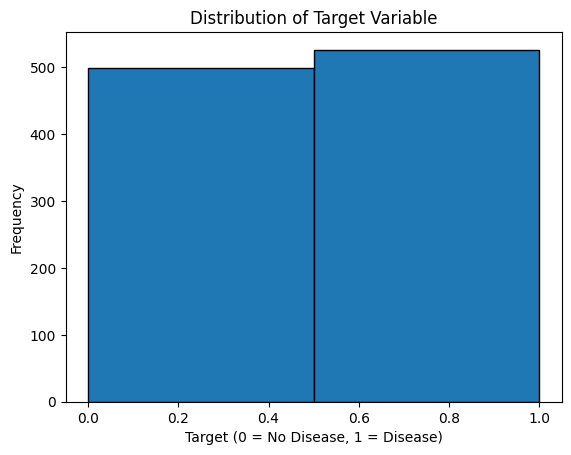

In [ ]:
plt.hist(df['target'], bins=2, edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Frequency')
plt.show()

### Independent Variable Distribution
This histogram shows the cholesterol levels of patients, which appear skewed toward lower values.

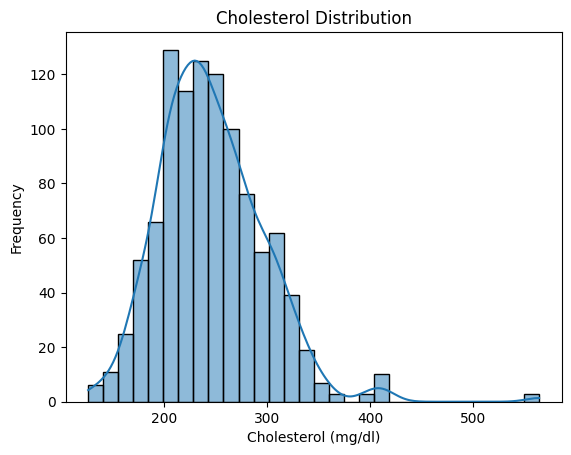

In [17]:
# Plot histogram for cholesterol levels
sns.histplot(df['chol'], bins=30, kde=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()

### Visualize an important input feature distribution
Let's visualize the distribution of the `age` feature to see how ages are spread across the dataset.


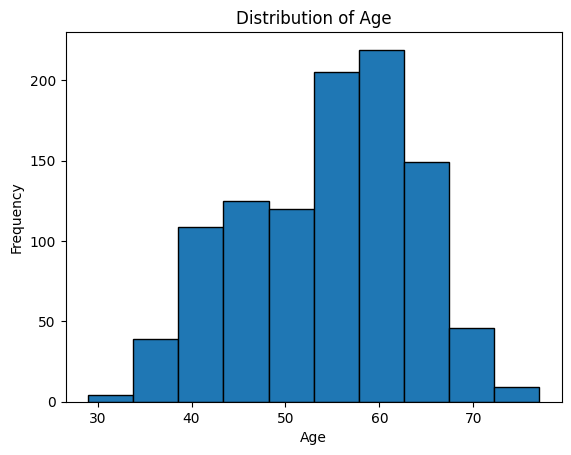

In [ ]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Explore relationships between variables
We'll use pairplots to visualize potential correlations between `age`, `chol` (cholesterol), and the target variable.


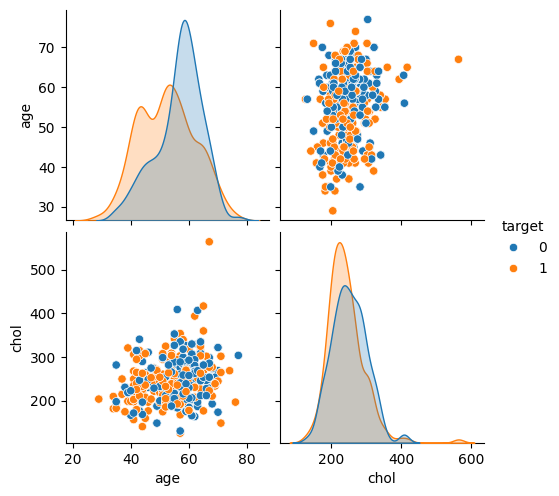

In [13]:
sns.pairplot(df[['age', 'chol', 'target']], hue='target')
plt.show()

### Create a new transformed feature
We’ll create a new column `chol_per_age` by dividing cholesterol (`chol`) by age.  
This helps normalize cholesterol levels relative to the patient’s age.


In [14]:
df['chol_per_age'] = df['chol'] / df['age']
df[['age', 'chol', 'chol_per_age']].head()

,age,chol,chol_per_age
0,52,212,4.076923
1,53,203,3.830189
2,70,174,2.485714
3,61,203,3.327869
4,62,294,4.741935


### Visualize the transformed feature
Plot the histogram of `chol_per_age` to understand its distribution and confirm the transformation worked as intended.


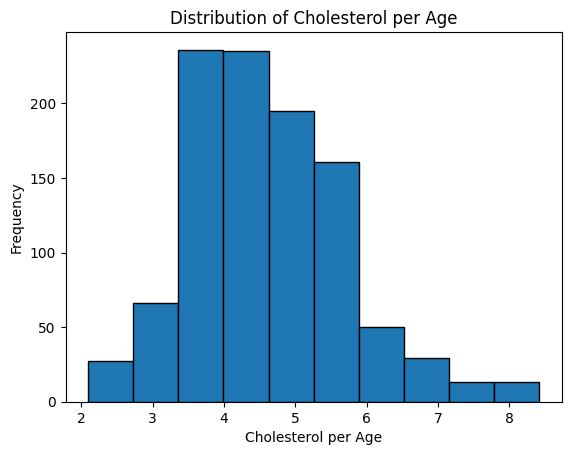

In [ ]:
plt.hist(df['chol_per_age'], bins=10, edgecolor='black')
plt.title('Distribution of Cholesterol per Age')
plt.xlabel('Cholesterol per Age')
plt.ylabel('Frequency')
plt.show()

### Correlation heatmap
Finally, we’ll visualize correlations between all numeric features to identify which ones might be most predictive of heart disease.


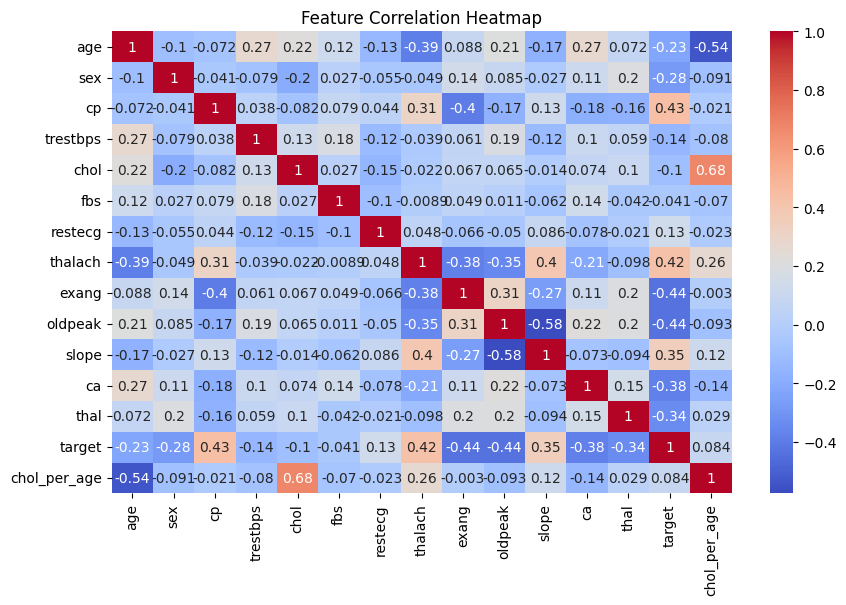

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()